In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

# Introduction

This dataset is about how the HR plays important role for company by analyzing starting from filling vacancy,preparing compensation and benefit such that 
employees will be much benfited and will try to be there for longer period. If not attrition comes into picture which is directly or indirectly loss for a company
as company invest each employee starting from hiring ,training,appointing then making them understand the pattern of work and environment of the company. Ultimately if an
old employee leaves it will be a great  loss for company as again the same process to be started with new one. So HR main critical role comes here to minimize attrition rate for any company
specially for those employees who are good perfomer. In this dataset will go through HR analysis on attrition rate and controlling them for more productivity and make the company more profitable 

# Hypothesis

Let's see the feature on the basis of which will predict attrition analysis by HR
1.  Age = Age group of employees in a company
2.  Busineess Travel = How frequently or rarely company sends employee on travelling . From this will able to know
                      which age group or which field employee travels a lot or less
3.  Daily Rate = per day wages that employee get
4.  Department = In which depratment the particular employee works
5.  DistanceFromHome = how long or shorter distance which employee stays
6.  Education = under one education field how many employee fall of same age group means how many employees are from life science
               background or medical etc.
7.  EducationField = from which stream the particular employee is
8.  Employee count = no of employees falls under each age group
9.  Employee Number = How many employees are from same age group
10. Environment Satisfaction = How many employees are satisfied from working environment
11. Gender = specifying category of male and female in a company
12. Hourly Rate = Per hour wages of an employee
13. Job involvement = How much an employee is involved in job assigned to them rating given as per that.
14. Job Label = on which position which particular employee is
15. Job Role = Particular Role assigned to each employee as per their education background and ability
16. Job Satisfaction = How much an employee is satisfied with the job they have been assigned
17. Marital Status = Married or not
18. Monthly Income = How much basic an employee get in a month
19. Monthly Rate = Total salary getting in a month
20. NoCompanieSWorked = how many company does an employee worked.
21. Over18 = Whether an employee age is above 18 or not
22. Overtime = overtime done or not by an employee
23. percentsalaryhike = what percentage hike does an employee get ever year
24. performance rating = Rating provided by HR or manager as per the performance of an employee
25. Relationship Satisfaction = how much an employee is satisfied with peer or subordinate or manager.
26. Standard Hours = working hours fixed by the company.
27. Stock option label = No of employees who got the right to purchase no of shares in lieu of salary in the company
                         at a discounted price
28. Total Working Years = Total no of years an employee worked from when he/she started their career.
29. TrainingTimesLastYear = No of times an employee sent for traing by the company to improve their skill.
30. WorkLifeBalance = the achievement by employees of equality between time spent working and personal life
31. YearsAtCompany = How long the employee is working in present company
32. YearsInCurrentRole = Since how long in a job role assigned to them.
33. YearsSinceLastPromotion = after getting last promotion how long an employee is continuing.
34. YearsWithCurrManager = how long an employee is working with his/her current manager.

Attrition here is our target on which will going build our model for precition. Clearly we can see that this problem is classification based problem and binary problem means yes or no is the result of target. So will work accordingly

In [2]:
pd.set_option("display.max_columns",None)

In [3]:
df = pd.read_csv('/Users/juhimishra/Downloads/IBM_HR_Attrition_Rate_Analytics-master/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
print('Total rows: ',df.shape[0])
print('Total columns: ',df.shape[1])

Total rows:  1470
Total columns:  35


In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# Check the name of coloumns which contain string
df.select_dtypes(include='object').columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [8]:
# Check the no. of coloumns which contain string
len(df.select_dtypes(include='object').columns)

9

we are getting total 9 object/string datatype which we need to convert to numeric form for our machine to understand

In [9]:
# Check the name of coloumns which contain numerical value
df.select_dtypes(include=['int64', 'float64']).columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [10]:
# Check the no. of coloumns which contain float or integer 
len(df.select_dtypes(include=['int64','float64']).columns)

26

Total integer or float data type are 26.

In [11]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [12]:
# Replace Label column (diagnosis) into binary codes
df['Attrition'] = df['Attrition'].replace({'Yes':1,'No':0})

In [13]:
# Let's check static data
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Below are the observations drawn from above static data:
1. There is no missing data 
2. Min age as per the company law is 18 and max is 60
3. daily rate min wage is 102 and max is 1499
4. min distance from home starts min from 1 km and max is 29km
5. Education here is categorical column
6. Categorical columns as per above data are - Education,Employee Count,EnvironmentSatisfaction,JobInvolvement,JobLavel,
                                               JobSatisfaction,PerformanceRating,
                                               RelationshipSatisfaction,StockOptionLevel,WorkLifebalance
    The above data are given ranking or rating so as per this considered as categorical column instead of continous

In [14]:
df.isna().sum().to_frame(name = 'Missing Values')

,Missing Values
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


No missing values even in categorical column

# Analysing attrition on the basis few seletive features

<AxesSubplot:xlabel='Age', ylabel='Attrition'>

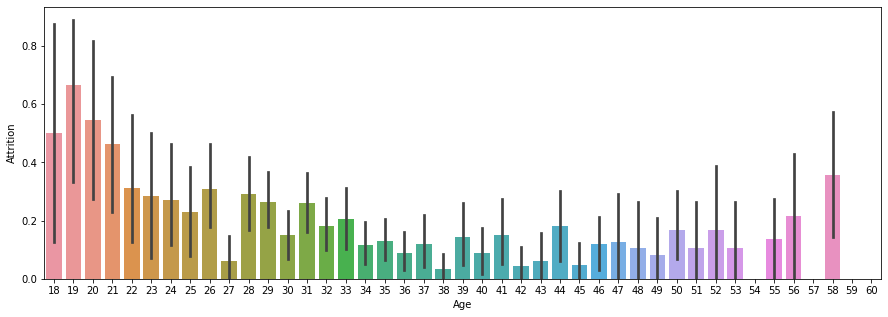

In [15]:
plt.figure(figsize=(15,5))
sns.barplot(x ='Age',y='Attrition',data =df)

Max age group of 19 are leaving the company. min attrition age group is 38

<AxesSubplot:xlabel='EducationField', ylabel='Attrition'>

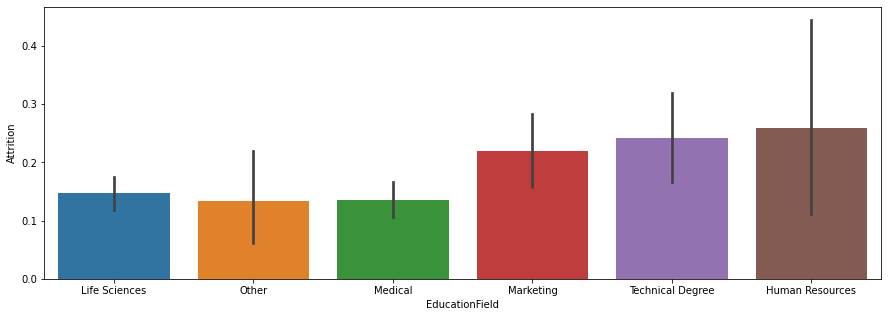

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(x ='EducationField',y='Attrition',data =df)

From the above data we can see that more attrition are from Humar Resorce data and least are from medical and others even lifescience are also nearby to less attrition rate

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Attrition'>

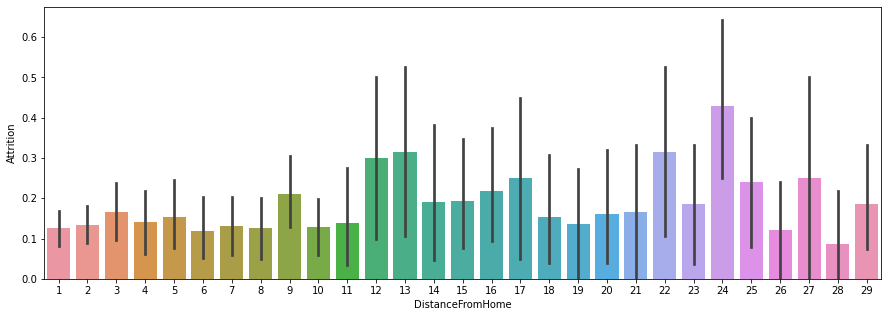

In [17]:
plt.figure(figsize=(15,5))
sns.barplot(x ='DistanceFromHome',y='Attrition',data =df)

here we got a very good analysis that is even distance also matters a lot due to which company is facing loss of employees.

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='Attrition'>

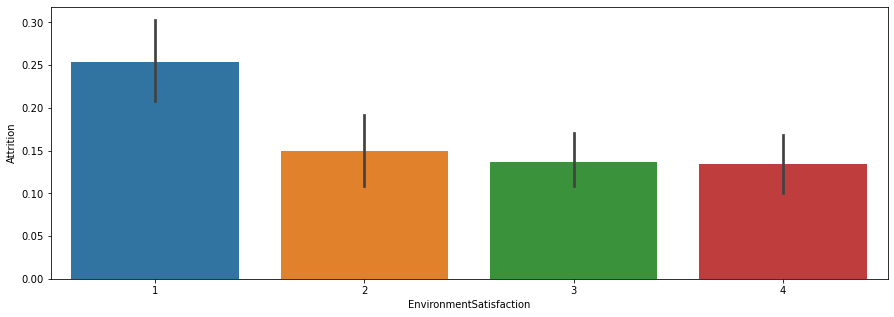

In [18]:
plt.figure(figsize=(15,5))
sns.barplot(x ='EnvironmentSatisfaction',y='Attrition',data =df)

Rating 1 is having higher attrition compare to others.

<AxesSubplot:xlabel='Gender', ylabel='Attrition'>

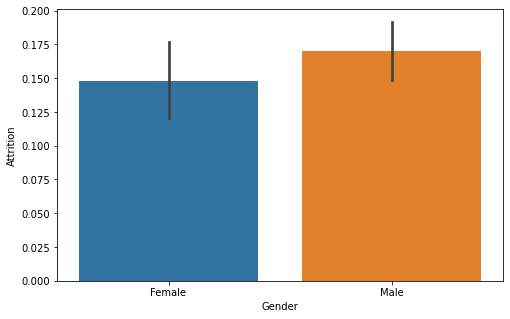

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(x ='Gender',y='Attrition',data =df)

Male attrition is higher than female this may happen due to higher number of male in a company let's check the same 

<AxesSubplot:xlabel='Gender', ylabel='Age'>

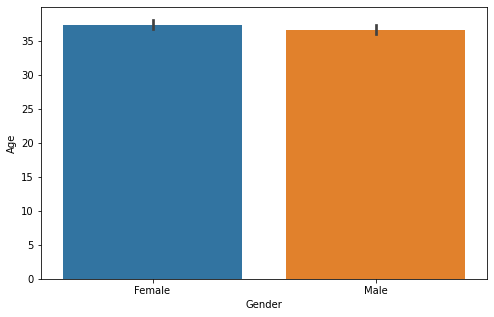

In [20]:
plt.figure(figsize=(8,5))
sns.barplot(x ='Gender',y='Age',data =df)

<AxesSubplot:xlabel='Gender', ylabel='Age'>

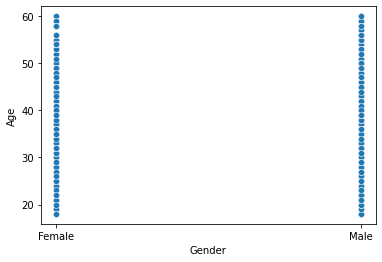

In [21]:
sns.scatterplot(x='Gender',y='Age',data=df)

We can see with the help of both scatter and count plot that count of male and female are almost same in organization so volume is not a concern main concern is that more male candidate are leaving the organization compare to female

<AxesSubplot:xlabel='MaritalStatus', ylabel='Attrition'>

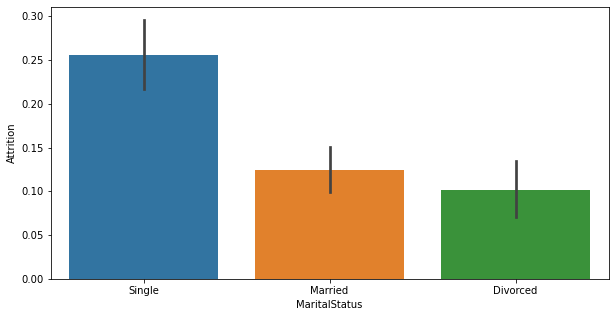

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(x ='MaritalStatus',y='Attrition',data =df)

Employees who are bachalor are leaving more . From this we analyse that either they are not much serious for their job or they are getting good offers from other comapny ans as havinh no responsibility so moving faster 

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='Attrition'>

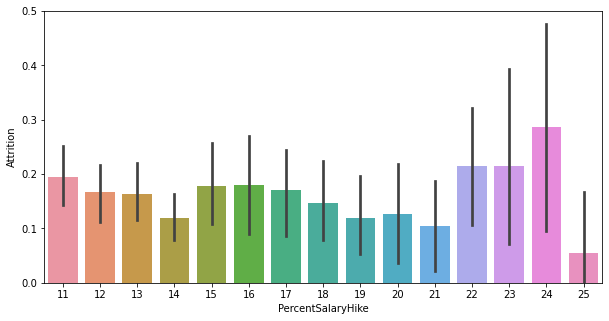

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(x ='PercentSalaryHike',y='Attrition',data =df)

Employees having higher salary hike are leaving more as we can see that 24% hike employees are on higher side

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='Attrition'>

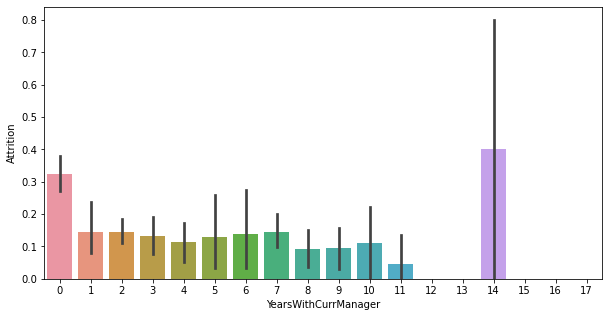

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(x="YearsWithCurrManager",y ='Attrition',data=df)

here also we got a very interesting insight that employee who are under one manager for longer period are leaving more

Checking all the categorical + object columns unique value and will use conversion process accordingly

In [26]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [27]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [28]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [29]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [30]:
df['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [31]:
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [32]:
df['Over18'].unique()

array(['Y'], dtype=object)

In [33]:
df['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

# Feature Engineering

In [34]:
# Replace Label columns into binary codes
df['Gender'] = df['Gender'].replace({'Male':1,'Female':0})
df['Over18'] = df['Over18'].replace({'Y':1})
df['OverTime']=df['OverTime'].replace({'Yes':1,'No':0})
df['MaritalStatus']=df['MaritalStatus'].replace({'Single':1,'Married':2,'Divorced':0})
df['Department']=df['Department'].replace({'Sales':0,'Research & Development':1,'Human Resources':2})    
df['BusinessTravel']=df['BusinessTravel'].replace({'Travel_Rarely':1,'Travel_Frequently':2,'Non-Travel':0})

In [35]:
le = LabelEncoder()

In [36]:
df1 = le.fit_transform(df['EducationField'])
pd.Series(df1)

0       1
1       1
2       4
3       1
4       3
       ..
1465    3
1466    3
1467    1
1468    3
1469    3
Length: 1470, dtype: int64

In [37]:
df['EducationField']=df1

In [38]:
df2 = le.fit_transform(df['JobRole'])
pd.Series(df2)

0       7
1       6
2       2
3       6
4       2
       ..
1465    2
1466    0
1467    4
1468    7
1469    2
Length: 1470, dtype: int64

In [39]:
df['JobRole']=df1

In [40]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,0,1,2,1,1,1,2,0,94,3,2,1,4,1,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,1,8,1,1,1,2,3,1,61,2,2,1,2,2,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,1,2,2,4,1,4,4,1,92,2,1,4,3,1,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,1,3,4,1,1,5,4,0,56,3,1,1,3,2,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,1,2,1,3,1,7,1,1,40,3,1,3,2,2,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2


Checking unique values of all categorical column which are either in integer/float form

In [41]:
df['Education'].unique()

array([2, 1, 4, 3, 5])

In [42]:
df['EmployeeCount'].unique()

array([1])

In [43]:
df['EnvironmentSatisfaction'].unique()

array([2, 3, 4, 1])

In [44]:
df['JobInvolvement'].unique()

array([3, 2, 4, 1])

In [45]:
df['JobLevel'].unique()

array([2, 1, 3, 4, 5])

In [46]:
df['JobSatisfaction'].unique()

array([4, 2, 3, 1])

In [47]:
df['PerformanceRating'].unique()

array([3, 4])

In [48]:
df['RelationshipSatisfaction'].unique()

array([1, 4, 2, 3])

In [49]:
df['StockOptionLevel'].unique()

array([0, 1, 3, 2])

In [50]:
df['WorkLifeBalance'].unique()

array([1, 3, 2, 4])

In [53]:
feature = ['Age','DailyRate','HourlyRate','MonthlyIncome','MonthlyRate',]

In [57]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel              0.082428
DailyRate                  -0.003519
Department                 -0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                     0.550371
JobSatisfaction            -0.329672
MaritalStatus              -0.443615
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

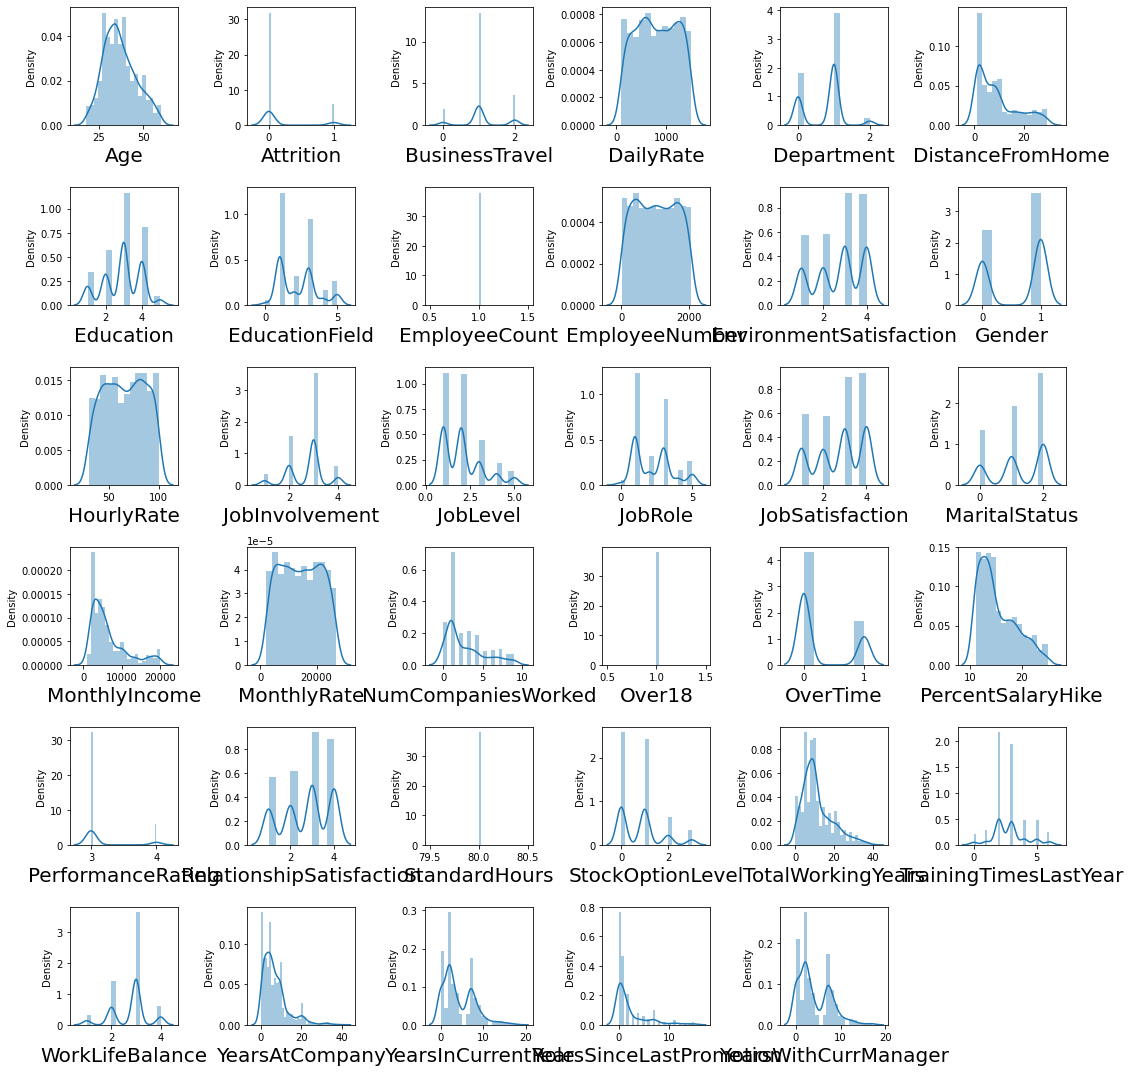

In [69]:
plt.figure(figsize = (15,15),facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=36:
        ax = plt.subplot(6,6,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber+=1
plt.tight_layout()

In [ ]:
skew_feature =['Age','MonthlyIncome']

In [80]:
# Removing skewness using Log Transformation
df['Age'] = np.log(df['Age'])
df['MonthlyIncome'] = np.log(df['MonthlyIncome'])

In [81]:
df.skew()

Age                        -0.154166
Attrition                   1.844366
BusinessTravel              0.082428
DailyRate                  -0.003519
Department                 -0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                     0.550371
JobSatisfaction            -0.329672
MaritalStatus              -0.443615
MonthlyIncome               0.286192
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

In [76]:
df_index=np.where(df['Age'].isnull()==True)

In [77]:
new_df = df.loc[df_index]

In [78]:
new_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


There is no 0 present in data

<AxesSubplot:>

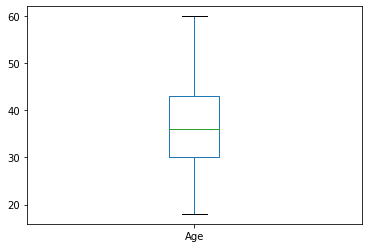

In [60]:
df.boxplot(column =['Age'], grid = False)

<AxesSubplot:>

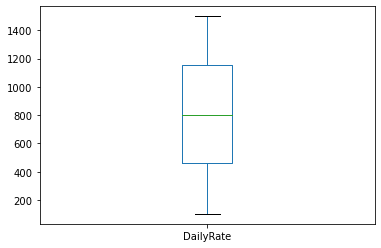

In [61]:
df.boxplot(column =['DailyRate'], grid = False)

<AxesSubplot:>

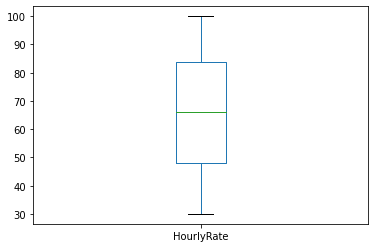

In [62]:
df.boxplot(column =['HourlyRate'], grid = False)

<AxesSubplot:>

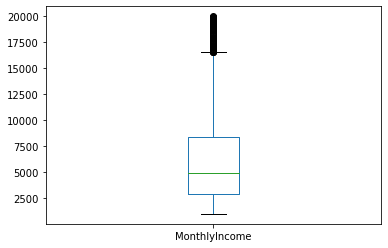

In [65]:
df.boxplot(column =['MonthlyIncome'], grid = False)

Outliers present in MonthlyIncome which we need to fix

<AxesSubplot:>

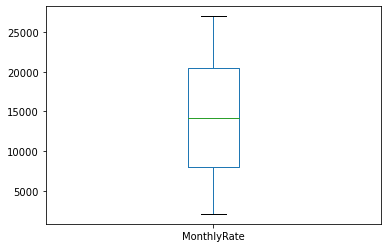

In [66]:
df.boxplot(column =['MonthlyRate'], grid = False)

Outliers found in 
1. Monthly Income

In [82]:
# find the IQR (Inter Quantile Range) to identify ouliers

# 1st Quantile
q1 = df.quantile(0.25)

# 3rd Quantile
q3 = df.quantile(0.75)

#IQR
iqr = q3 - q1

In [83]:
out_MonthlyIncome = (q3.MonthlyIncome + (1.5*iqr.MonthlyIncome))
out_MonthlyIncome

10.619331667493288

### Searching for outliers if any

In [84]:
index = np.where(df['MonthlyIncome']>out_MonthlyIncome)
index

(array([], dtype=int64),)

There is no outlier in any of the data 

# Checking Correlation Between features

In [86]:
# Finding out the correlation between features

corr = df.corr()
corr.shape

(35, 35)

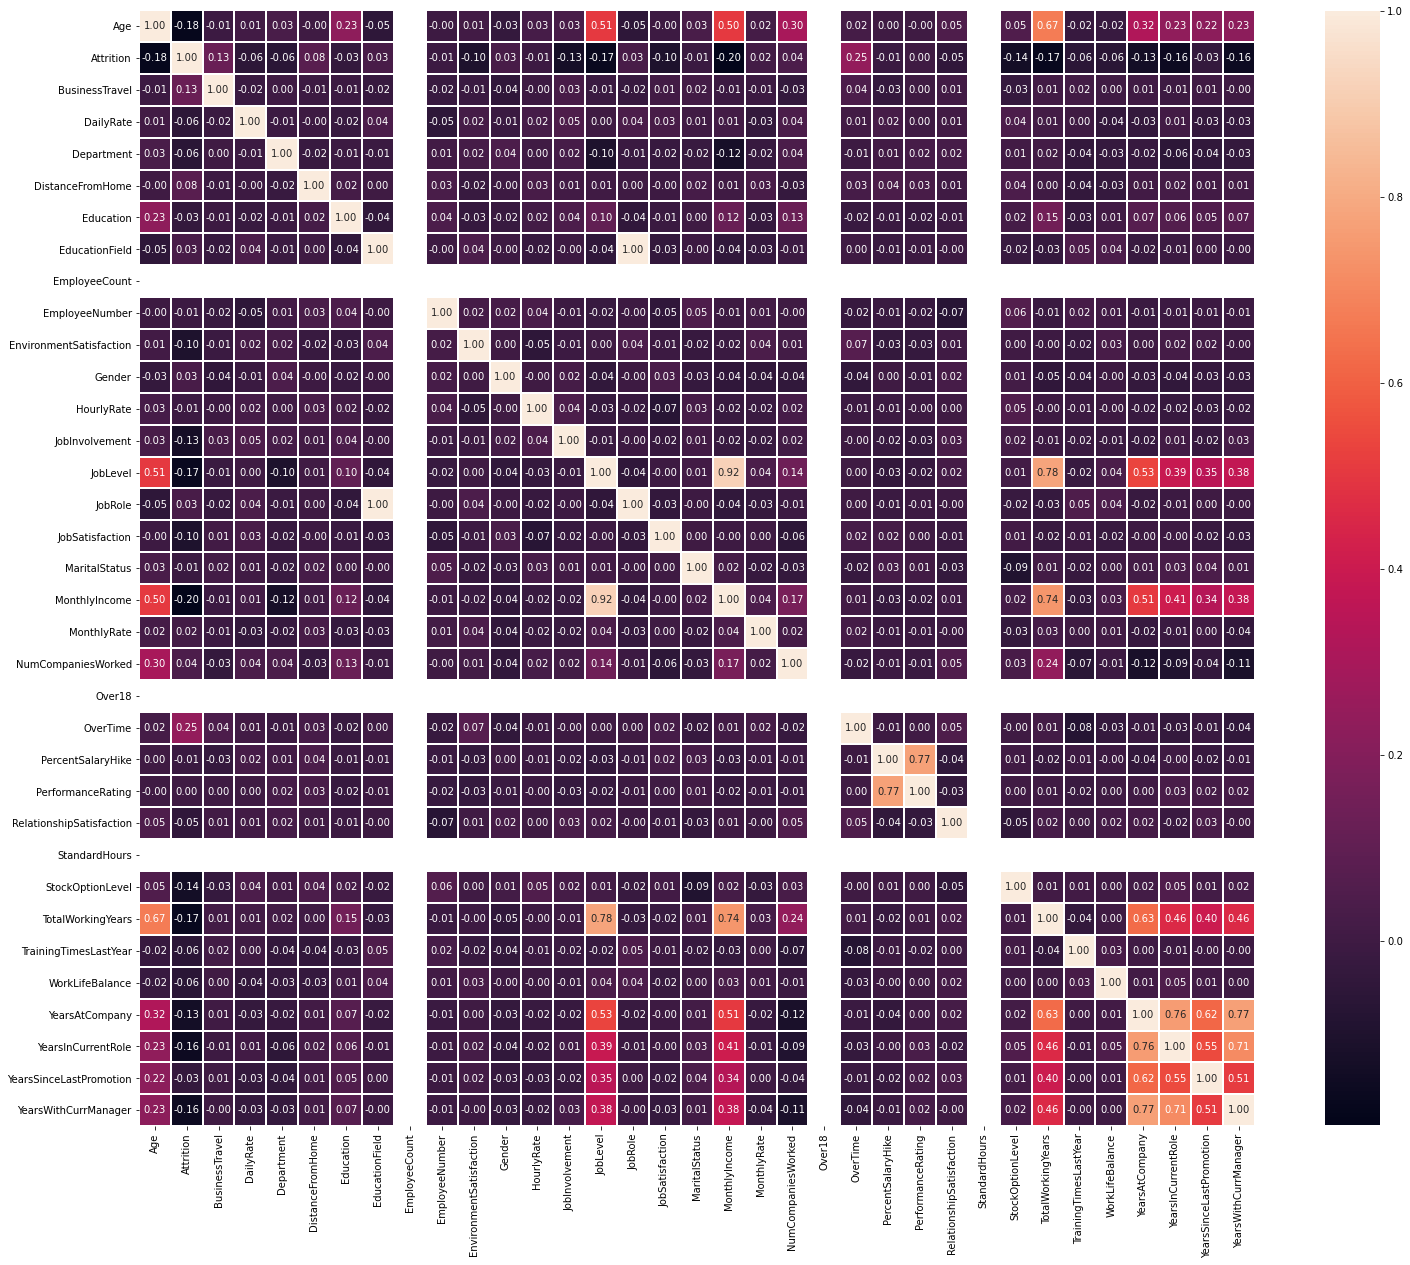

In [89]:
# Plotting the heatmap of cprrelation between features

plt.figure(figsize=(25,25))

sns.heatmap(corr, cbar=True, square=True, cbar_kws={'shrink':.82},fmt='.2f', annot=True, annot_kws={'size':10},linewidths= True)
plt.show()

In [90]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.180844,-0.007698,0.011325,0.031264,-0.000385,0.229078,-0.049288,NaN,-0.001993,0.009171,-0.034304,0.025407,0.029007,0.506739,-0.049288,-0.004733,0.034849,0.504385,0.018110,0.302529,NaN,0.021645,0.000810,-0.000066,0.047174,NaN,0.052414,0.670938,-0.021304,-0.018954,0.324892,0.234385,0.223246,0.226029
Attrition,-0.180844,1.000000,0.127006,-0.056652,-0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,-0.103369,0.029453,-0.006846,-0.130016,-0.169105,0.026846,-0.103481,-0.011195,-0.198210,0.015170,0.043494,NaN,0.246118,-0.013478,0.002889,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,-0.007698,0.127006,1.000000,-0.015539,0.002640,-0.009696,-0.008670,-0.023489,NaN,-0.018538,-0.011310,-0.044896,-0.004164,0.029300,-0.011696,-0.023489,0.008666,0.016350,-0.009116,-0.008440,-0.030743,NaN,0.042752,-0.025727,0.001683,0.008926,NaN,-0.028257,0.007972,0.016357,0.004209,0.005212,-0.005336,0.005222,-0.000229
DailyRate,0.011325,-0.056652,-0.015539,1.000000,-0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,0.018355,-0.011716,0.023381,0.046135,0.002966,0.037709,0.030571,0.005724,0.012503,-0.032182,0.038153,NaN,0.009135,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,0.031264,-0.063991,0.002640,-0.007109,1.000000,-0.017225,-0.007996,-0.013720,NaN,0.010895,0.019395,0.041583,0.004144,0.024586,-0.101963,-0.013720,-0.021001,-0.017700,-0.124974,-0.023642,0.035882,NaN,-0.007481,0.007840,0.024604,0.022414,NaN,0.012193,0.015762,-0.036875,-0.026383,-0.022920,-0.056315,-0.040061,-0.034282
DistanceFromHome,-0.000385,0.077924,-0.009696,-0.004985,-0.017225,1.000000,0.021042,0.002013,NaN,0.032916,-0.016075,-0.001851,0.031131,0.008783,0.005303,0.002013,-0.003669,0.021916,0.005683,0.027473,-0.029251,NaN,0.025514,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.229078,-0.031373,-0.008670,-0.016806,-0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,-0.027128,-0.016547,0.016775,0.042438,0.101589,-0.039592,-0.011296,0.000107,0.121069,-0.026084,0.126317,NaN,-0.020322,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.049288,0.026846,-0.023489,0.037709,-0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,0.043163,-0.002504,-0.021941,-0.002655,-0.044933,1.000000,-0.034401,-0.001730,-0.039934,-0.027182,-0.008663,NaN,0.002259,-0.011214,-0.005614,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.001993,-0.010577,-0.018538,-0.050990,0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,0.017621,0.022556,0.035179,-0.006888,-0.018519,-0.002516,-0.046247,0.047224,-0.005431,0.012648,-0.001251,NaN,-0.024037,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


Here we got many features which are correlated to each other so will use KSelect feature for best feature selection and build our model accordingly

# Preprocessing

In [91]:
from sklearn.feature_selection import SelectKBest, f_classif

In [92]:
# Splitting feature and target into x and respectively
x = df.drop('Attrition',axis = 1)
y = df.Attrition

x is feature and y is target

In [94]:
x.shape

(1470, 34)

In [95]:
y.shape

(1470,)

In [120]:
best_features = SelectKBest(score_func = f_classif, k = 23)
fit = best_features.fit(x,y)
df_score = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)

In [121]:
feature_scores = pd.concat([df_columns, df_score],axis = 1)
feature_scores.columns = ['Feature_name','score'] # name output column
print(feature_scores.nlargest(23,'score')) # print 17 best features

                Feature_name      score
21                  OverTime  94.656457
17             MonthlyIncome  60.032335
0                        Age  49.633511
27         TotalWorkingYears  44.252491
13                  JobLevel  43.215344
31        YearsInCurrentRole  38.838303
33      YearsWithCurrManager  36.712311
26          StockOptionLevel  28.140501
30            YearsAtCompany  27.001624
12            JobInvolvement  25.241985
1             BusinessTravel  24.068022
15           JobSatisfaction  15.890004
9    EnvironmentSatisfaction  15.855209
4           DistanceFromHome   8.968277
3                 Department   6.035877
29           WorkLifeBalance   6.026116
28     TrainingTimesLastYear   5.211646
2                  DailyRate   4.726640
24  RelationshipSatisfaction   3.095576
19        NumCompaniesWorked   2.782287
32   YearsSinceLastPromotion   1.602218
5                  Education   1.446308
10                    Gender   1.274587


As we can see that after DistanceFromHome there is not so much effective features which will help our model to perform much better. So for better performance selected 23 feature

# Model Building

In [123]:
df_select = df[['OverTime','MonthlyIncome','Age','TotalWorkingYears','JobLevel','YearsInCurrentRole','YearsWithCurrManager',
               'StockOptionLevel','YearsAtCompany','JobInvolvement','BusinessTravel','JobSatisfaction','EnvironmentSatisfaction',
               'DistanceFromHome','Department','WorkLifeBalance','TrainingTimesLastYear','DailyRate','RelationshipSatisfaction',
               'NumCompaniesWorked','YearsSinceLastPromotion','Education','Gender']]

In [124]:
df_select.head()

,OverTime,MonthlyIncome,Age,TotalWorkingYears,JobLevel,YearsInCurrentRole,YearsWithCurrManager,StockOptionLevel,YearsAtCompany,JobInvolvement,BusinessTravel,JobSatisfaction,EnvironmentSatisfaction,DistanceFromHome,Department,WorkLifeBalance,TrainingTimesLastYear,DailyRate,RelationshipSatisfaction,NumCompaniesWorked,YearsSinceLastPromotion,Education,Gender
0,1,8.698347,3.713572,8,2,4,5,0,6,3,1,4,2,1,0,1,0,1102,1,8,0,2,0
1,0,8.542861,3.891820,10,2,7,7,1,10,2,2,2,3,8,1,3,3,279,4,1,1,1,1
2,1,7.644919,3.610918,7,1,0,0,0,0,2,1,3,4,2,1,3,3,1373,2,6,0,2,1
3,1,7.975565,3.496508,8,1,7,0,0,8,3,2,3,4,3,1,3,3,1392,3,1,3,4,0
4,0,8.151333,3.295837,6,1,2,2,1,2,3,1,2,1,2,1,3,3,591,4,9,2,1,1


In [125]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(df_select)


# Finding Best Random State

In [149]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

In [130]:
maxscore = 0
maxrs = 0

for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size = 0.30,random_state = i)
    knn = KNeighborsClassifier()
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    rsc = accuracy_score(y_test,pred)
    if rsc>maxscore:
        maxscore=rsc
        maxrs=i
print("Best accuracy score is:",maxscore,"On Random state: ",maxrs)

Best accuracy score is: 0.891156462585034 On Random state:  631


In [139]:
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size = 0.25, random_state = i)

In [140]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [141]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[304,   8],
       [ 50,   6]])

In [142]:
print(classification_report(y_test,y_pred,digits = 2))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       312
           1       0.43      0.11      0.17        56

    accuracy                           0.84       368
   macro avg       0.64      0.54      0.54       368
weighted avg       0.79      0.84      0.80       368



In [144]:
K_f = KFold(n_splits = 3, shuffle = True)
K_f

KFold(n_splits=3, random_state=None, shuffle=True)

In [145]:
for train, test in K_f.split([1,2,3,4,5,6,7,8,9,10]):
    
    print ('train:', train, 'test:', test)

train: [0 1 3 5 6 9] test: [2 4 7 8]
train: [1 2 4 6 7 8 9] test: [0 3 5]
train: [0 2 3 4 5 7 8] test: [1 6 9]


In [146]:
cross_val_score(KNeighborsClassifier(), x_scaler,y,cv=5).mean()

0.846938775510204

In [151]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression

In [152]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8668478260869565

In [153]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[297,  15],
       [ 34,  22]])

In [155]:
cross_val_score(log_reg, x_scaler,y,cv=5).mean()

0.880952380952381

In [156]:
from sklearn.ensemble import RandomForestClassifier

In [157]:
rf = RandomForestClassifier()

In [161]:
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8641304347826086

In [162]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[309,   3],
       [ 47,   9]])

In [169]:
cross_val_score(rf, x_scaler,y,cv=5).mean()

0.8585034013605443

In [170]:
from sklearn.tree import DecisionTreeClassifier

In [171]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7934782608695652

In [172]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[269,  43],
       [ 33,  23]])

In [173]:
cross_val_score(rf, x_scaler,y,cv=5).mean()

0.8578231292517007

by validating overall score of all model Our logistic regression is performing much better compare to others so will do hyperparameter tuning for the same.

# Hyperparameter Tuning

In [208]:
print(log_reg.get_params().keys())

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


In [214]:
# Logistic Regression
param = ({'C':[0.001,2,3,4,5,6,7,10],
         'max_iter':[100,1000,2500],
         'penalty':['l1','l2','elasticnet','none'],
         'solver':['newton-cg','lbfgs','liblinear','sag','saga']
        })

In [215]:
gridsearch = GridSearchCV(log_reg, param_grid=param,cv=5)

In [216]:
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 2, 3, 4, 5, 6, 7, 10],
                         'max_iter': [100, 1000, 2500],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [217]:
gridsearch.best_params_

{'C': 2, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [219]:
final_log = LogisticRegression(C = 2,max_iter = 100, penalty = 'l2',solver ='newton-cg')
final_log.fit(x_train,y_train)
pred = final_log.predict(x_test)
score = accuracy_score(y_test,pred)
print(score*100)

86.68478260869566


Not much change as we can see average score of logistic was also approx 86% and gridsearch is also giving the almost same score that is 86%

# Save the Model

In [221]:
import joblib
joblib.dump(final_log,'FinalmodelAttrition.pk1')

['FinalmodelAttrition.pk1']